## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

- Churn : 특정 시간 내에 서비스를 사용한 고객 중 이탈한 고객을 측정하는 지표

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 탐색

In [29]:
df = pd.read_csv('/content/drive/MyDrive/DAT/1차 과제/customer_churn_dataset-testing-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [30]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [32]:
df = df.drop('CustomerID', axis=1) # 필요 없는 정보 drop
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [33]:
columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

In [34]:
df.shape

(64374, 11)

In [35]:
df.dtypes

,0
Age,int64
Gender,object
Tenure,int64
Usage Frequency,int64
Support Calls,int64
Payment Delay,int64
Subscription Type,object
Contract Length,object
Total Spend,int64
Last Interaction,int64


In [36]:
df['Subscription Type'].value_counts()

,count
Subscription Type,
Standard,21502
Basic,21451
Premium,21421


In [37]:
df['Contract Length'].value_counts()

,count
Contract Length,
Monthly,22130
Annual,21410
Quarterly,20834


In [38]:
df['Gender'].value_counts()

,count
Gender,
Female,34353
Male,30021


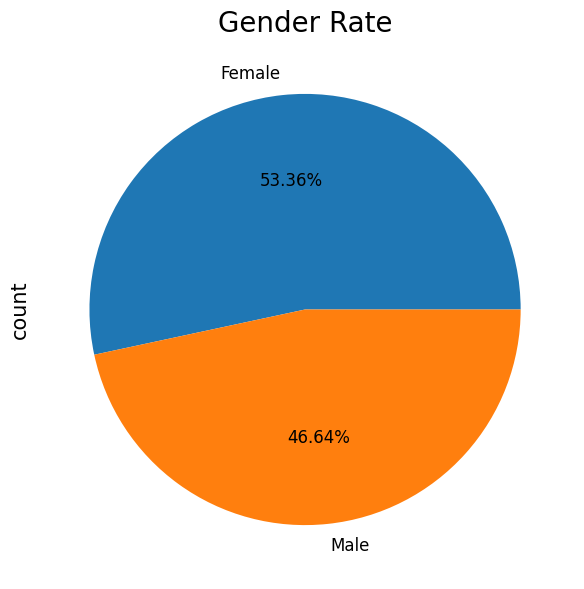

In [39]:
# 남녀 비율

plt.figure(figsize=(7,7))
plt.title('Gender Rate' , fontsize=20)
plt.ylabel('Gender' , fontsize=15)
df['Gender'].value_counts().plot.pie(autopct = '%.2f%%', textprops = {'fontsize' : 12})

plt.show()

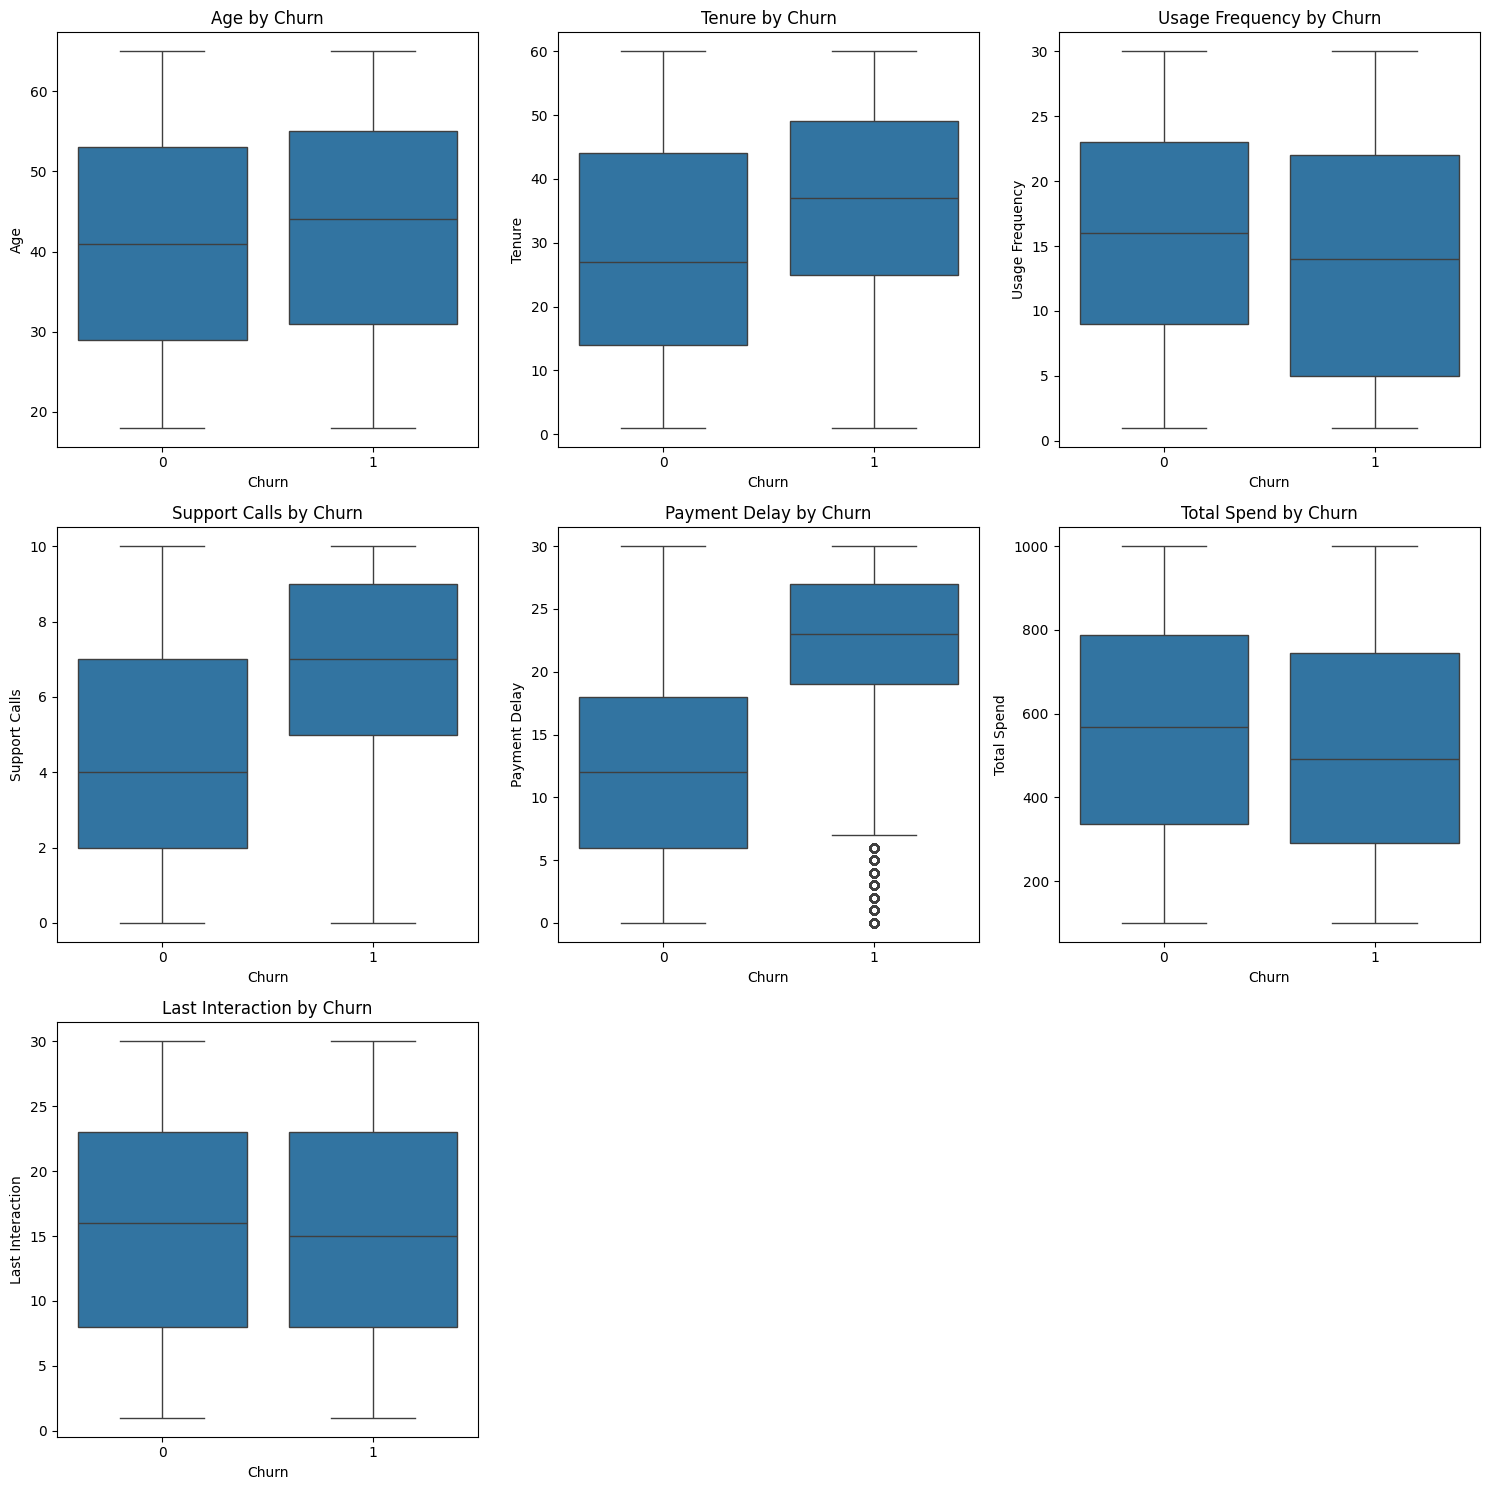

In [40]:
n_cols = 3
n_rows = 3

plt.figure(figsize=(15, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title('%s by Churn' % column)

plt.tight_layout()
plt.show()

### => Support Calls와 Payment Delay가 Churn과 가장 연관이 있는 것으로 보임

### Support Calls가 5일 때 1의 비율이 훅 늘어남

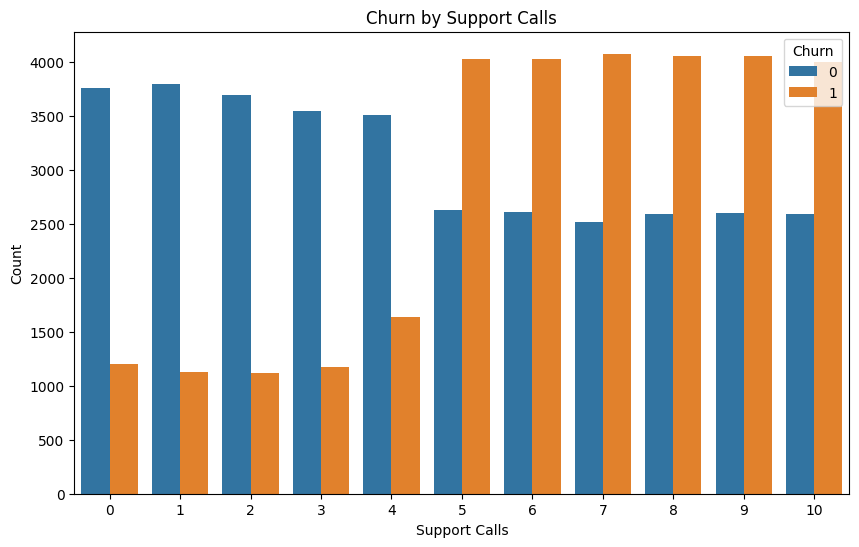

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Support Calls', hue='Churn', data=df)
plt.title('Churn by Support Calls')
plt.xlabel('Support Calls')
plt.ylabel('Count')
plt.show()


### Delay Payment가 16일 때 1의 비율이 훅 늘어나고, 22가 될 때 또 한 번 훅 늘어남

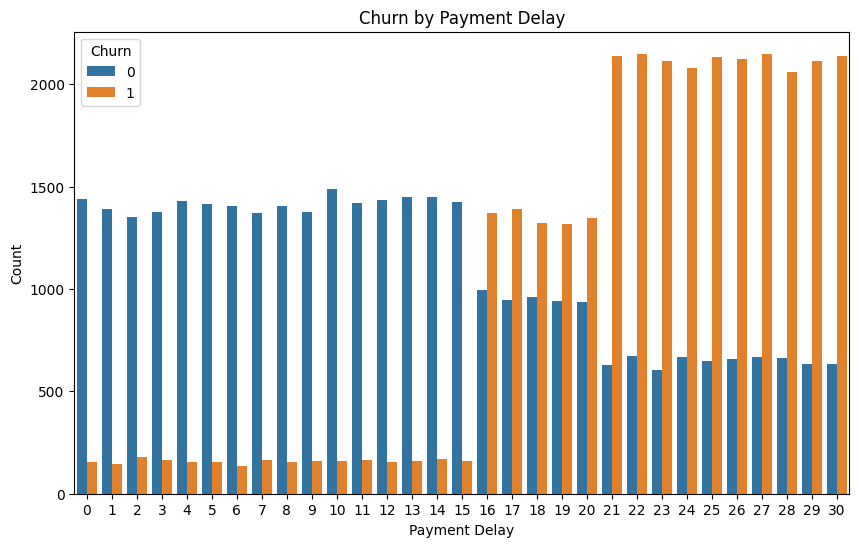

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Delay', hue='Churn', data=df)
plt.title('Churn by Payment Delay')
plt.xlabel('Payment Delay')
plt.ylabel('Count')
plt.show()

In [43]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [44]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Subscription Type'] = df['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium' : 2})
df['Contract Length'] = df['Contract Length'].map({'Monthly': 0, 'Quarterly': 1, 'Annual' : 2})
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,0,598,9,1
1,41,0,28,28,7,13,1,0,584,20,0
2,47,1,27,10,2,29,2,2,757,21,0
3,35,1,9,12,5,17,2,1,232,18,0
4,53,0,58,24,9,2,1,2,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,1,947,14,1
64370,37,1,6,1,5,22,1,2,923,9,1
64371,25,1,39,14,8,30,2,0,327,20,1
64372,50,0,18,19,7,22,1,0,540,13,1


# 모델 돌리기 (XGBoost)

In [45]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [48]:
params = {
    'objective': 'binary:logistic',
    'max_depth' : 3,
    'eval_metric': 'logloss',
    'eta': 0.1
    }

In [49]:
num_boost_round = 100

In [51]:
bst = xgb.train(params, dtrain, num_boost_round)

In [54]:
preds = bst.predict(dtest)

predictions = [1 if pred > 0.5 else 0 for pred in preds]

from sklearn.metrics import accuracy_score, f1_score, precision_score
accuracy = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
print('f1_score', f1_score)
print('accuracy', accuracy)
print('precision', precision)

f1_score 0.9968708827404481
accuracy 0.9970485436893204
precision 0.9985153414714616


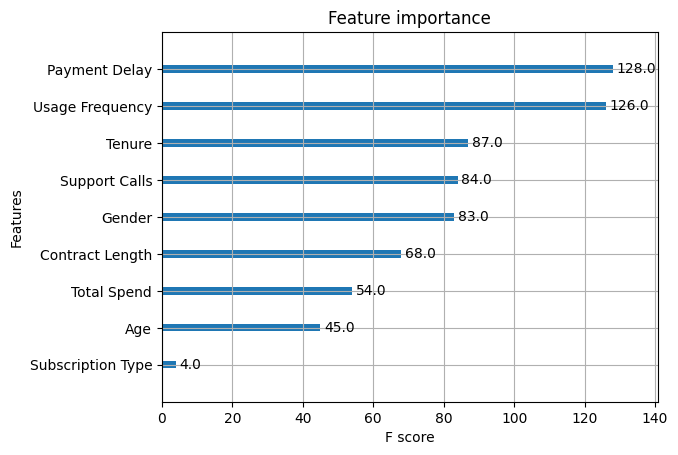

In [63]:
# 변수 중요도 출력
xgb.plot_importance(bst)
plt.show()


=> 아까 예상했던거에서 payment Delay가 있었는데 그게 가장 높은거를 알 수 있음
=> Usage Frequency는 아무래도 직접적인 연관이 있는건데 사용을 안 하더라도 탈퇴를 안 하는게 있어서 boxplot에서는 비슷하고, 여기서는 좀 작용을 하지 않았을까 추측


# 모델 (Random Forest)

In [53]:
f = pd.read_csv('/content/drive/MyDrive/DAT/1차 과제/customer_churn_dataset-testing-master.csv')
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,0,598,9,1
1,41,0,28,28,7,13,1,0,584,20,0
2,47,1,27,10,2,29,2,2,757,21,0
3,35,1,9,12,5,17,2,1,232,18,0
4,53,0,58,24,9,2,1,2,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,1,947,14,1
64370,37,1,6,1,5,22,1,2,923,9,1
64371,25,1,39,14,8,30,2,0,327,20,1
64372,50,0,18,19,7,22,1,0,540,13,1


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score  # 필요한 함수들을 import

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_result = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('f1_score:', f1_result)
print('accuracy:', accuracy)
print('precision:', precision)


f1_score: 0.9994243894416577
accuracy: 0.9994563106796116
precision: 0.9996709985194934


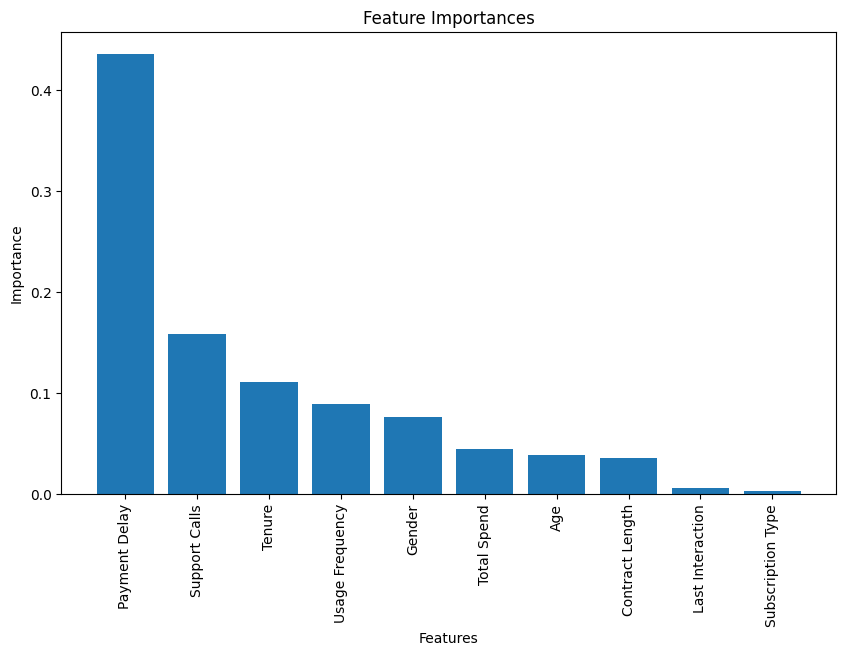

In [64]:
import numpy as np
importances = rf.feature_importances_
features = X.columns

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


=> 여기서는 boxplot에서 예측했던거랑 같게 됐음!

## 결론

- 두 모델에서 payment Delay가 가장 높은 변수 중요도를 가지고 있기에 이 변수가 고객의 이탈과 관련하여 중요한 것으로 파악됨